In [194]:
# This project focuses on Twitch, a popular site that allows gamers to stream their gameplay and others to watch and chat. The main skill being demonstrated in the project is the ability to utilize the search and organizational power of SQL within a Python environment so that Python libraries can then be applied to the results from SQL queries. The main tool to accomplish this will be the use of SQLAlchemy and the 

import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import numpy as np 
from matplotlib import pyplot as plt

In [196]:
# I want to check and then standardize the column headings. The first step is converting the CSV file into a DataFrame using Pandas. Then I pass a command that renames the columns using a list of the new column names.

stream_data = pd.read_csv('stream.csv')
print(stream_data.head(5))

stream_data.columns = ['time', 'device_id', 'login', 'player', 'country', 'channel', 'game', 'stream', 'subscribers']

#print(stream_data.head(2))
chat_data = pd.read_csv('chat.csv')
chat_data.columns = ['time', 'device_id', 'login', 'player', 'country', 'channel', 'game']
print(chat_data.columns)
print(stream_data.columns)

                  time                                 device_id  \
0  2015-01-01 18:33:52  40ffc2fa6534cf760becbdbf5311e31ad069e46e   
1  2015-01-01 23:35:33  9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760   
2  2015-01-01 04:39:38  2f9c3f9ee1033b71a3819564243f20ef3bec0183   
3  2015-01-01 11:15:30  0cda8226ba2583424c80c3c1c22c1256b080ad17   
4  2015-01-01 11:28:19  e3288ca5e3153aa85e32f64cdd994b7666968dcf   

                                      login  channel country    player  \
0  085c1eb7b587bfe654f0df7b4ba7f4fc4013636c    frank      US  iphone_t   
1  5ad49a7b408ce452140b180dd6efb57a9f4d22c7   george      US      site   
2  5b9a43e68f019185f55615d0b83019dee4b5d06f    frank      US      site   
3  02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b  estelle      CH      site   
4  b920c228acbcbebee26d9c79f6eb73b73a9480c7    morty      FR      site   

                  game stream_format subscriber  
0    League of Legends           NaN        NaN  
1                 DayZ       chunked      Fals

In [198]:
# Create_engine from SQLAlchemy is what will allow me to conduct SQL queries within the Python environment. Basically it's creating the ability to access the DataFrames stream_data and chat_data which were created above under the names streaming and chatting in SQL queries. The reason the if_exists input is entered is so that I can run different queries without running into problems from previous instances. 

engine = create_engine('sqlite://', echo=False)
stream_data.to_sql('streaming', engine, if_exists='replace', index=False)
chat_data.to_sql('chatting', engine, if_exists='replace', index=False, )

In [200]:
# Here I am able to run a SQL query using the SELECT x FROM y; SQL syntax and transfer the results into a Python DataFrame. These particular lines are querying to find the distinct games contained in the data.

results_stream = engine.execute("Select distinct game from streaming")
final_stream = pd.DataFrame(results_stream)
print(final_stream)

                                   0
0                  League of Legends
1                               DayZ
2                             Dota 2
3                Heroes of the Storm
4   Counter-Strike: Global Offensive
5    Hearthstone: Heroes of Warcraft
6      The Binding of Isaac: Rebirth
7                            Agar.io
8                  Gaming Talk Shows
9                               None
10                     Rocket League
11                    World of Tanks
12             ARK: Survival Evolved
13                      SpeedRunners
14                    Breaking Point
15                         Duck Game
16  Devil May Cry 4: Special Edition
17                      Block N Load
18                         Fallout 3
19             Batman: Arkham Knight
20                    Reign Of Kings
21          The Witcher 3: Wild Hunt
22       The Elder Scrolls V: Skyrim
23                 Super Mario Bros.
24                              H1Z1
25                    The Last of Us
2

In [202]:
# Here, I am doing a similiar query but with the goal of finding the unique streams (i.e., means of access) to Twitch.

results_stream = engine.execute("Select distinct channel from streaming")
final_stream = pd.DataFrame(results_stream)
print(final_stream)

                0
0        iphone_t
1            site
2           embed
3         android
4          ipad_t
5            home
6       frontpage
7        xbox_one
8          amazon
9            roku
10     chromecast
11        xbox360
12       facebook
13    android_pip
14           ouya
15  nvidia shield


In [204]:
# Here I am aggregating data within the CSV file by combining a group by command and a count function. I group by the games and then count the number of rows within each group (i.e., how many rows each game has). Because I'm not interested in any particular column other than game, I just count all to simplify the results. 

results_stream = engine.execute("Select distinct game, count(*) from streaming group by game order by count(*) desc")
final_stream = pd.DataFrame(results_stream, columns=['game', 'number of players'])
print(final_stream)
stream_games = final_stream['game']
stream_num_players = final_stream['number of players']
lst_stream_games = list(stream_games)
print(lst_stream_games)
lst_stream_num_of_players = list(stream_num_players)
print(lst_stream_num_of_players)

                                game  number of players
0                  League of Legends             193533
1                             Dota 2              85608
2   Counter-Strike: Global Offensive              54438
3                               DayZ              38004
4                Heroes of the Storm              35310
5      The Binding of Isaac: Rebirth              29467
6                  Gaming Talk Shows              28115
7                     World of Tanks              15932
8    Hearthstone: Heroes of Warcraft              14399
9                            Agar.io              11480
10                     Rocket League               7087
11             ARK: Survival Evolved               4158
12                      SpeedRunners               3367
13                              None               3124
14                         Duck Game               1063
15                         Fallout 3                485
16  Devil May Cry 4: Special Edition            

In [242]:
# I want to get a clearer picture of where the players for a specific game, in this case Leage of Legends, are located. To do this I need to focus only on rows where the game is League of Legends and then group by country and run a count function on the resulting rows.

results_stream = engine.execute("Select distinct game, country, count(*) from streaming where game = 'League of Legends' group by country order by count(*) desc")
final_stream = pd.DataFrame(results_stream)
print(final_stream)
final_stream_countries_lst = list(final_stream[1])
print(final_stream_countries_lst)

                     0     1      2
0    League of Legends    US  85606
1    League of Legends    CA  13034
2    League of Legends    DE  10835
3    League of Legends  None   7641
4    League of Legends    GB   6964
..                 ...   ...    ...
151  League of Legends    GY      1
152  League of Legends    GA      1
153  League of Legends    AZ      1
154  League of Legends    AD      1
155  League of Legends    A1      1

[156 rows x 3 columns]
['US', 'CA', 'DE', None, 'GB', 'TR', 'AU', 'SE', 'NL', 'DK', 'GR', 'PL', 'PT', 'RO', 'IT', 'FR', 'TW', 'BR', 'MX', 'NO', 'BE', 'ES', 'FI', 'CZ', 'NZ', 'RU', 'HU', 'AT', 'LT', 'BG', 'HK', 'HR', 'CL', 'RS', 'IL', 'CH', 'JP', 'SG', 'AR', 'MA', 'IE', 'CO', 'SK', 'SI', 'SA', 'AE', 'BA', 'PH', 'KW', 'PR', 'EE', 'LV', 'MY', 'CR', 'UA', 'TN', 'VE', 'KR', 'CY', 'EG', 'VN', 'AL', 'PE', 'MK', 'TT', 'ZA', 'DO', 'BB', 'MT', 'JM', 'IN', 'QA', 'JO', 'IS', 'UY', 'PA', 'GE', 'NI', 'CN', 'LU', 'MO', 'BS', 'LB', 'ME', 'IQ', 'BH', 'GT', 'TH', 'PK', 'DZ', 'BY

In [208]:
# I wanted to experiment with the SQL syntax and so this is a different way to produce the same groupings and count. As you can see, the numbers are the same and the data is slightly easier to read since League of Legends is not repeated for each row. 

results_stream = engine.execute("Select distinct country, count(*) from streaming where game = 'League of Legends' group by country order by count(*) desc")
final_stream = pd.DataFrame(results_stream)
print(final_stream)

        0      1
0      US  85606
1      CA  13034
2      DE  10835
3    None   7641
4      GB   6964
..    ...    ...
151    GY      1
152    GA      1
153    AZ      1
154    AD      1
155    A1      1

[156 rows x 2 columns]


In [210]:
# Now I will go through a similar process for the chat data. 

results_chat = engine.execute("SELECT game FROM chatting")
final_chat = pd.DataFrame(results_chat)
print(final_chat)

                                       0
0       Devil May Cry 4: Special Edition
1                      League of Legends
2                      League of Legends
3                                 Dota 2
4                                 Dota 2
...                                  ...
148556                    World of Tanks
148557                    World of Tanks
148558                              DayZ
148559                              DayZ
148560               Heroes of the Storm

[148561 rows x 1 columns]


In [212]:
# For chatting data, I want to look at the popularity of different channels (i.e., ways to access Twitch). To do this, I will group by channel and then count the results.

results_stream = engine.execute("Select channel, count(channel) from streaming group by channel order by count(*) desc")
final_stream = pd.DataFrame(results_stream)
print(final_stream)

                0       1
0            site  246115
1        iphone_t  100689
2         android   93508
3          ipad_t   53646
4           embed   19819
5        xbox_one    4863
6            home    3479
7       frontpage    1567
8          amazon    1155
9         xbox360     985
10           roku     233
11     chromecast     149
12       facebook      83
13           ouya       3
14  nvidia shield       3
15    android_pip       2


In [214]:
# Next, I want to demostrate the use of a CASE statement to construct a new column with paremeters to group to apply a genre label to the games. Within a SQL environment, the 'END AS genre' would have used the alias function to rename the column within the query. It wasn't working, so I just renamed the columns once the query were changed to a DataFrame.

results_stream = engine.execute("select game, \
    case \
        when game = 'League of Legends' \
            then 'MOBA' \
        when game = 'Dota 2' \
            then 'MOBA' \
        when game = 'Heroes of the Storm' \
            then 'MOBA' \
        when game = 'Counter-Strike: Global Offensive' \
            then 'FPS' \
        when game = 'DayZ' \
            then 'Survival' \
        when game = 'Survival Evolved' \
            then 'Survival' \
        else 'Other' \
    end as 'genre' \
    from streaming \
    group by game")
final_stream_2 = pd.DataFrame(results_stream)
final_stream_2.columns = ['game', 'genre']
print(final_stream_2)

                                game     genre
0                               None     Other
1              ARK: Survival Evolved     Other
2                            Agar.io     Other
3              Batman: Arkham Knight     Other
4                            Besiege     Other
5                          Blackjack     Other
6                       Block N Load     Other
7                     Breaking Point     Other
8        Bridge Constructor Medieval     Other
9                     Choice Chamber     Other
10                  Cities: Skylines     Other
11  Counter-Strike: Global Offensive       FPS
12                              DayZ  Survival
13                             Depth     Other
14  Devil May Cry 4: Special Edition     Other
15                            Dota 2      MOBA
16                         Duck Game     Other
17                         Fallout 3     Other
18                 Gaming Talk Shows     Other
19                Grand Theft Auto V     Other
20           

In [216]:
# Now moving to visualize the data from our earlier searches. Because of the number of games, visualization becomes difficult because the graph is trying to relate too much data. To address this, I will focus on the most popular games. I can do this by hand, transferring the results into new lists as in this cell, or I can do with Python commands as in the next cell. 

games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"]
 
viewers =  [1070, 472, 302, 239, 210, 171, 170, 90, 86, 71]



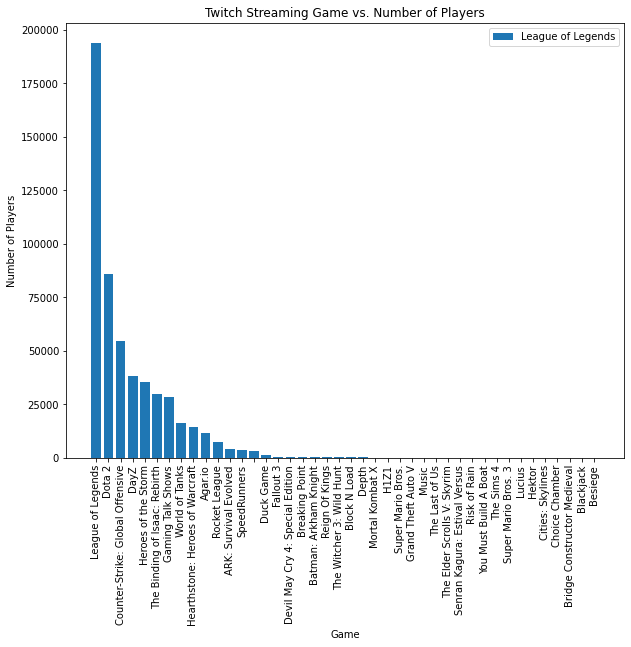

In [218]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(range(len(lst_stream_games)), lst_stream_num_of_players)
plt.xlabel('Game')
plt.ylabel('Number of Players')
plt.legend(['League of Legends', 'Dota 2', 'Counter-Strike: Global Offensive', 'DayZ'])
plt.title('Twitch Streaming Game vs. Number of Players')
ax.set_xticks(range(len(lst_stream_games)))
ax.set_xticklabels(lst_stream_games, rotation=90)

plt.show()

In [220]:
# Since I created the DataFrame final_stream above that has a list of unique games, I can create a list using that DataFrame.
print(final_stream)

                0       1
0            site  246115
1        iphone_t  100689
2         android   93508
3          ipad_t   53646
4           embed   19819
5        xbox_one    4863
6            home    3479
7       frontpage    1567
8          amazon    1155
9         xbox360     985
10           roku     233
11     chromecast     149
12       facebook      83
13           ouya       3
14  nvidia shield       3
15    android_pip       2


In [222]:
# Now moving to visualize the data from our earlier searches, we want to get a sense of players per game. I already have this as lists from cells above, but there are too many to visualize. I need to determine a cutoff point. 

print(lst_stream_games)
print(lst_stream_num_of_players)
total_players = 0
for ele in range(0, len(lst_stream_num_of_players)):
    total_players = total_players + lst_stream_num_of_players[ele]
print(total_players)
total_games = len(lst_stream_games)
print(total_games)
top_games = lst_stream_games[0:15]
print(len(top_games))
players_per_top_games = lst_stream_num_of_players[0:15]
print(players_per_top_games)

total_players_top_games = 0
for ele in range(0, len(players_per_top_games)):
    total_players_top_games = total_players_top_games + players_per_top_games[ele]
print(total_players_top_games)
print('The top 15 games represent ' + str(100 * total_players_top_games/total_players) + '% of all players.')

['League of Legends', 'Dota 2', 'Counter-Strike: Global Offensive', 'DayZ', 'Heroes of the Storm', 'The Binding of Isaac: Rebirth', 'Gaming Talk Shows', 'World of Tanks', 'Hearthstone: Heroes of Warcraft', 'Agar.io', 'Rocket League', 'ARK: Survival Evolved', 'SpeedRunners', None, 'Duck Game', 'Fallout 3', 'Devil May Cry 4: Special Edition', 'Breaking Point', 'Batman: Arkham Knight', 'Reign Of Kings', 'The Witcher 3: Wild Hunt', 'Block N Load', 'Depth', 'Mortal Kombat X', 'H1Z1', 'Super Mario Bros.', 'Grand Theft Auto V', 'Music', 'The Last of Us', 'The Elder Scrolls V: Skyrim', 'Senran Kagura: Estival Versus', 'Risk of Rain', 'You Must Build A Boat', 'The Sims 4', 'Super Mario Bros. 3', 'Lucius', 'Hektor', 'Cities: Skylines', 'Choice Chamber', 'Bridge Constructor Medieval', 'Blackjack', 'Besiege']
[193533, 85608, 54438, 38004, 35310, 29467, 28115, 15932, 14399, 11480, 7087, 4158, 3367, 3124, 1063, 485, 231, 161, 117, 50, 45, 34, 27, 22, 7, 6, 5, 4, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1

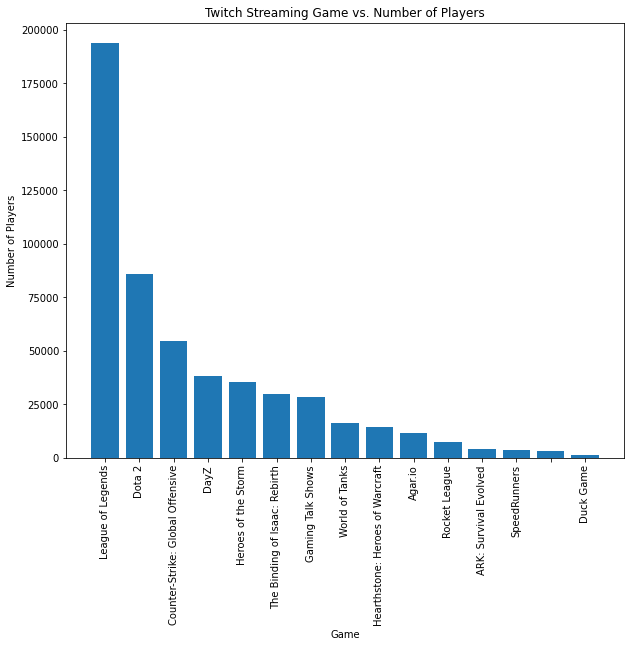

In [224]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(range(len(top_games)), players_per_top_games)
plt.xlabel('Game')
plt.ylabel('Number of Players')
plt.title('Twitch Streaming Game vs. Number of Players')
ax.set_xticks(range(len(top_games)))
ax.set_xticklabels(top_games, rotation=90)

plt.show()

In [226]:
#In order to get a graph that is easier to read and focuses more on the most used games, I cut the lists down to those with more than 1000 users.
lst_stream_games = list(stream_games)
lst_stream_games_for_new_graph = lst_stream_games[0:15]
print(lst_stream_games_for_new_graph)

lst_stream_num_of_players = list(stream_num_players)
lst_stream_num_of_players_for_new_graph = lst_stream_num_of_players[0:15]
print(lst_stream_num_of_players_for_new_graph)

['League of Legends', 'Dota 2', 'Counter-Strike: Global Offensive', 'DayZ', 'Heroes of the Storm', 'The Binding of Isaac: Rebirth', 'Gaming Talk Shows', 'World of Tanks', 'Hearthstone: Heroes of Warcraft', 'Agar.io', 'Rocket League', 'ARK: Survival Evolved', 'SpeedRunners', None, 'Duck Game']
[193533, 85608, 54438, 38004, 35310, 29467, 28115, 15932, 14399, 11480, 7087, 4158, 3367, 3124, 1063]


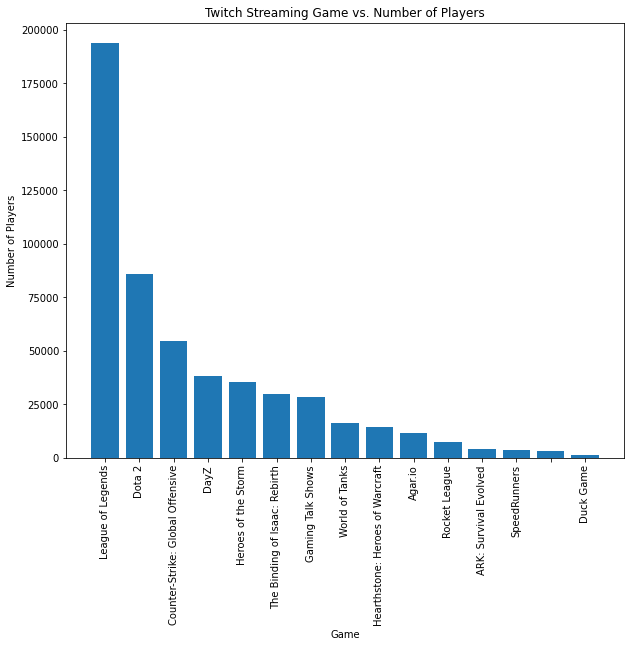

In [228]:
#This is the visualization of the focused data
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(range(len(lst_stream_games_for_new_graph)), lst_stream_num_of_players_for_new_graph)
plt.xlabel('Game')
plt.ylabel('Number of Players')
plt.title('Twitch Streaming Game vs. Number of Players')
ax.set_xticks(range(len(lst_stream_games_for_new_graph)))
ax.set_xticklabels(lst_stream_games_for_new_graph, rotation=90)

plt.show()

In [240]:
#Now we want to understand the breakdown of all League of Legends players. We will use a piechart to get a sense for how distinct parts relate to a known whole.
print()
final_stream_lol_countries = final_stream[0]
lst_final_stream_lol_countries = list(final_stream_lol_countries)

print(lst_final_stream_lol_countries)

final_stream_lol_countries_numbers = final_stream[1]
lst_final_stream_lol_countries_numbers = list(final_stream_lol_countries_numbers)

print(lst_final_stream_lol_countries_numbers)

['site', 'iphone_t', 'android', 'ipad_t', 'embed', 'xbox_one', 'home', 'frontpage', 'amazon', 'xbox360', 'roku', 'chromecast', 'facebook', 'ouya', 'nvidia shield', 'android_pip']
['site', 'iphone_t', 'android', 'ipad_t', 'embed', 'xbox_one', 'home', 'frontpage', 'amazon', 'xbox360', 'roku', 'chromecast', 'facebook', 'ouya', 'nvidia shield', 'android_pip']
[246115, 100689, 93508, 53646, 19819, 4863, 3479, 1567, 1155, 985, 233, 149, 83, 3, 3, 2]


In [235]:
print(lst_final_stream_lol_countries)


['site', 'iphone_t', 'android', 'ipad_t', 'embed', 'xbox_one', 'home', 'frontpage', 'amazon', 'xbox360', 'roku', 'chromecast', 'facebook', 'ouya', 'nvidia shield', 'android_pip']


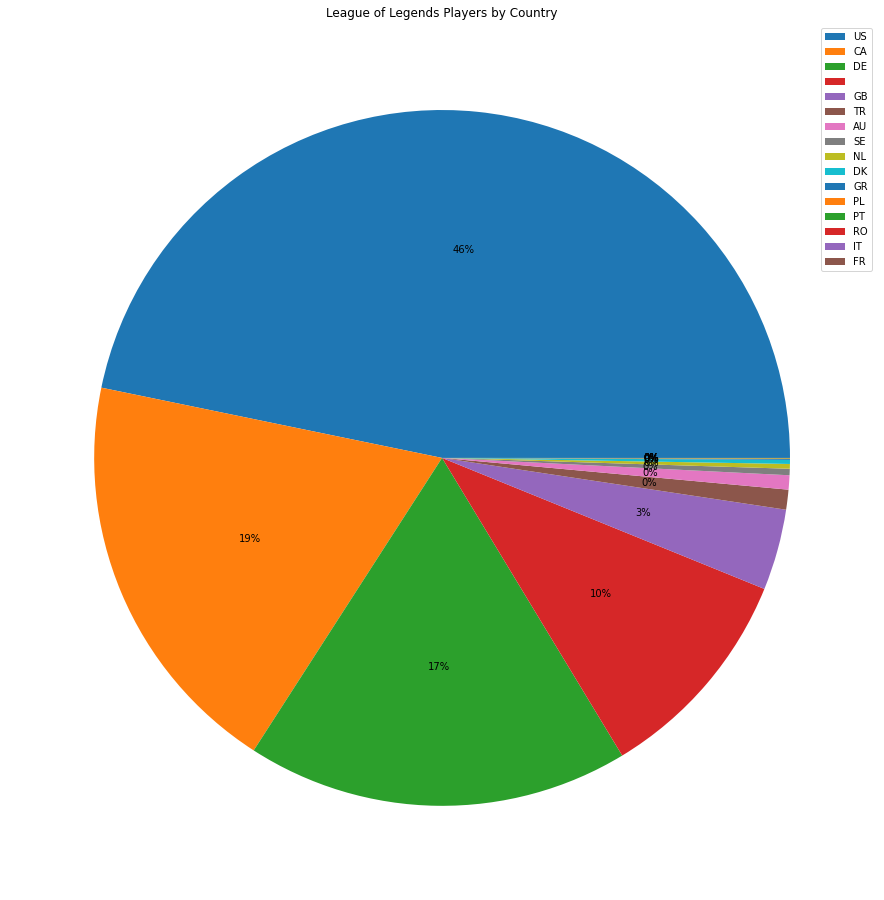

In [243]:
# Pie plots are not as useful, especially when you have so many data points. It is helpful for getting a sense of just how concentrated the data is in a few countries.
plt.figure(figsize=(20,16))
plt.pie(lst_final_stream_lol_countries_numbers, autopct='%d%%')
plt.legend(final_stream_countries_lst)
plt.title('League of Legends Players by Country')
plt.show()

16


<Figure size 432x288 with 0 Axes>

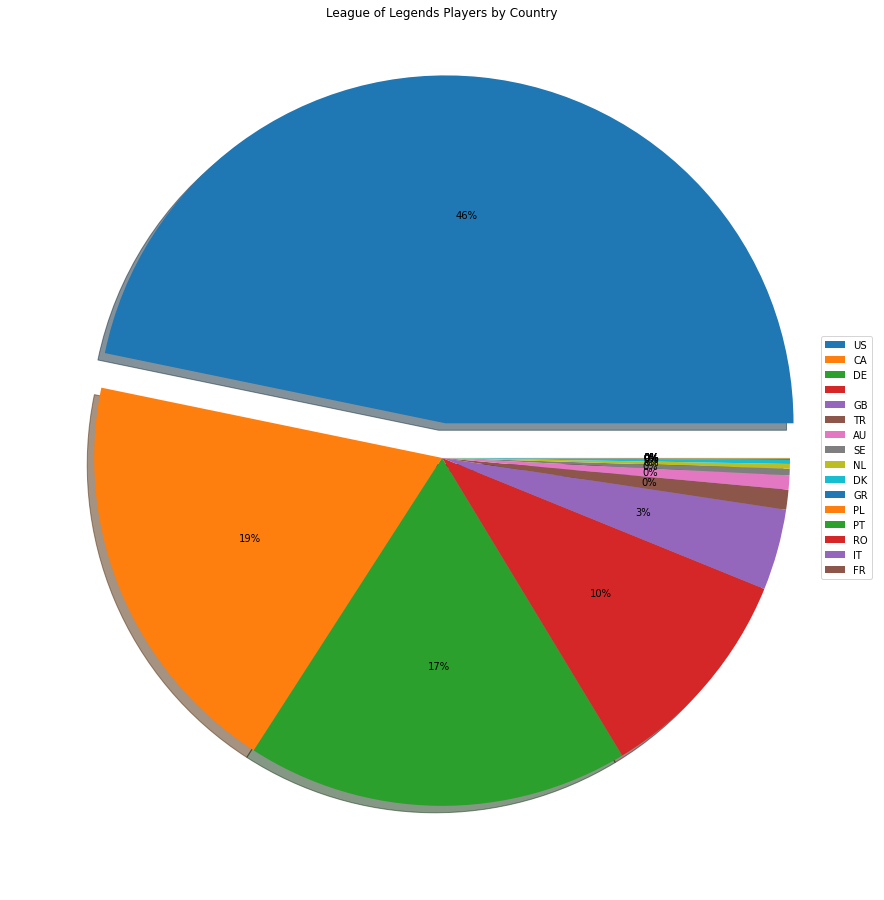

In [244]:
#Now we want to focus on the most popular areas

final_stream_lol_countries = final_stream[0]
lst_final_stream_lol_countries = list(final_stream_lol_countries)

lst_final_stream_lol_countries_cut = lst_final_stream_lol_countries[0:27]
lst_final_stream_lol_countries_numbers_cut = lst_final_stream_lol_countries_numbers[0:27]
plt.clf()
print(len(lst_final_stream_lol_countries_numbers))
plt.figure(figsize=(20,16))
explode = (.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(lst_final_stream_lol_countries_numbers, autopct='%d%%', explode=explode, shadow=True)
plt.title('League of Legends Players by Country')
plt.legend(final_stream_countries_lst, loc="right")
plt.show()

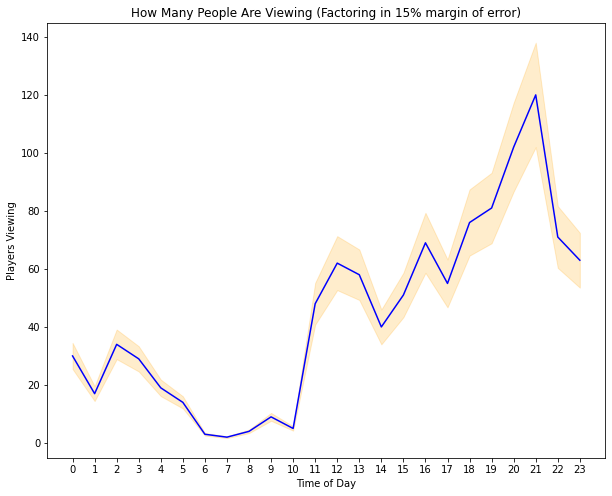

In [234]:
#Finally, a line graph by hour in the US that includes a 15% margin of error.

hour = range(24)
 
viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.plot(hour, viewers_hour, color='blue')
plt.xlabel('Time of Day')
plt.ylabel('Players Viewing')
plt.title('How Many People Are Viewing (Factoring in 15% margin of error)')
y_upper = [1.15 * t for t in viewers_hour]
y_lower = [.85 * t for t in viewers_hour]
plt.fill_between(hour, y_upper, y_lower, alpha=.2, color='orange')
ax.set_xticks(hour)
ax.set_xticklabels(hour)
plt.show()
